In [51]:
import json
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [15]:
DATA_PATH = '../hogwild-python/logs/'

## Logs loading

In [25]:
with open(DATA_PATH + 'log_20190410171033.json') as f:
    logs = json.load(f)
    logs = logs[0]
    f.close()

## Inspection

In [26]:
logs.keys()

dict_keys(['start_time', 'end_time', 'running_time', 'n_workers', 'running_mode', 'sync_epochs', 'accuracy_train', 'accuracy_1_train', 'accuracy_-1_train', 'accuracy_val', 'accuracy_1_val', 'accuracy_-1_val', 'accuracy_test', 'accuracy_1_test', 'accuracy_-1_test', 'losses_val', 'losses_train'])

In [41]:
worker_ids = {log['worker_idx'] for log in logs['losses_train']}

train_losses_per_worker = []

for id_ in worker_ids:
    train_losses = [log['loss_train'] for log in logs['losses_train'] if log['worker_idx'] == id_]
    train_losses_per_worker += [train_losses]
    
val_losses = [log['loss_val'] for log in logs['losses_val']]

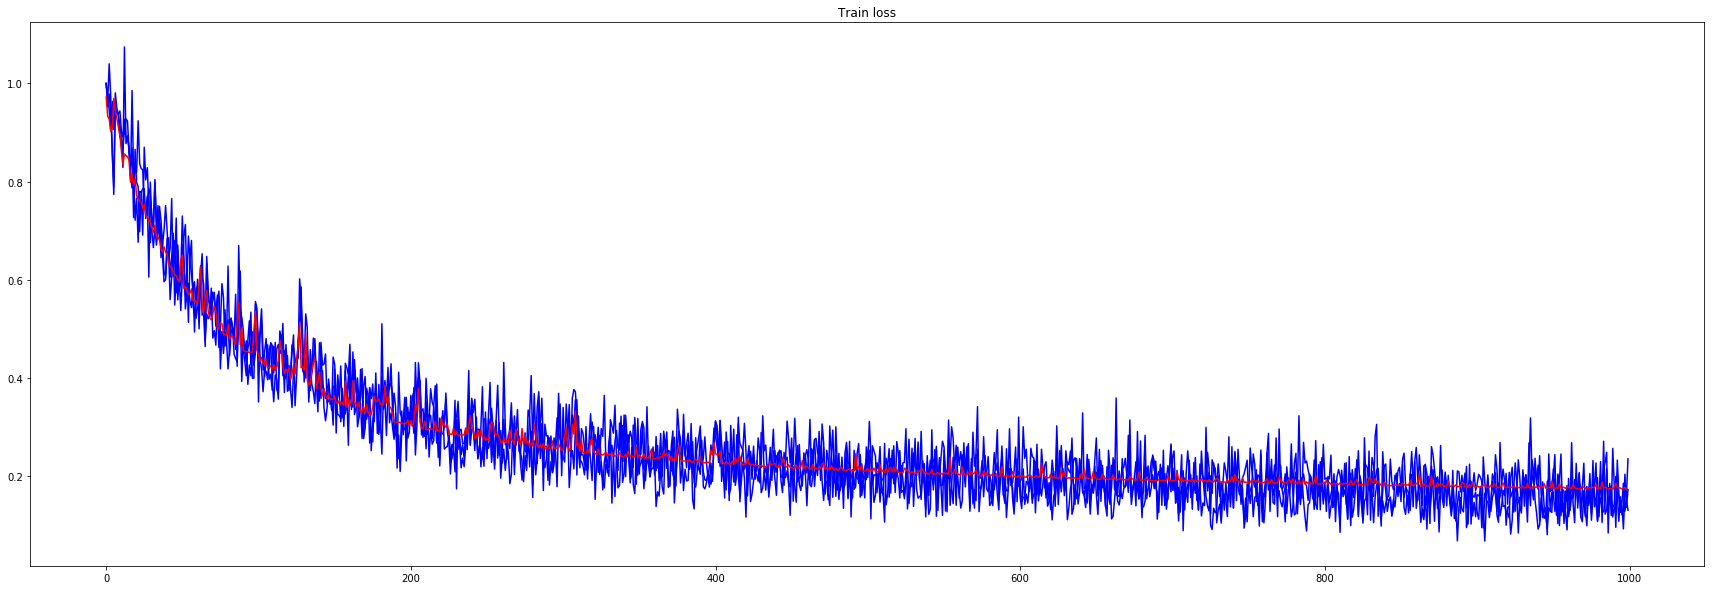

In [44]:
plt.figure(figsize=(30,10))

for i in range(len(train_losses_per_worker)):
    plt.plot(train_losses_per_worker[i], c='b')
    
plt.plot(val_losses, c='r')
plt.title('Train loss')
plt.show()

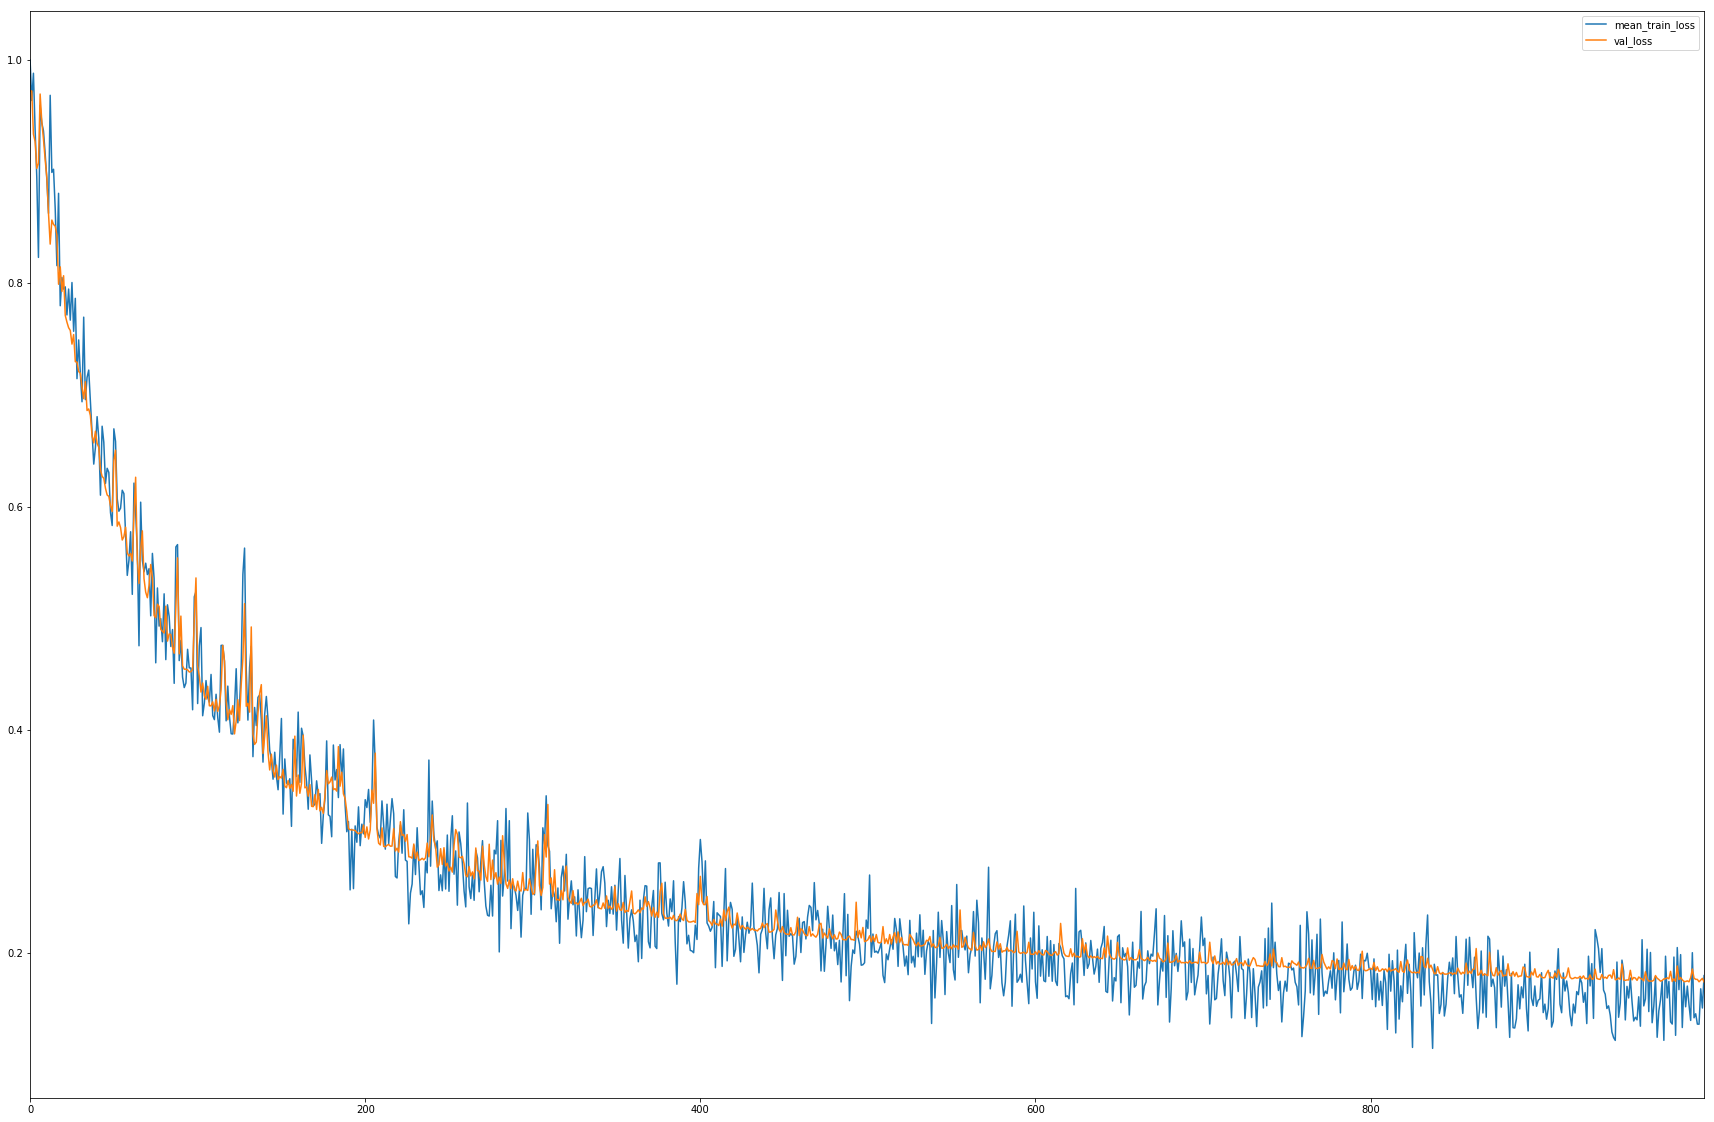

In [61]:
log_df = pd.DataFrame(np.array(train_losses_per_worker).T)
log_df['mean_train_loss'] = log_df.mean(axis=1)
log_df['val_loss'] = [val_losses[0]] + val_losses
log_df[['mean_train_loss','val_loss']].plot(figsize=(30,20))